In [1]:
from EnergyProfiler import PowerZone,Profiler

In [ ]:
powerzones=[PowerZone("/sys/class/powercap/intel-rapl:0:0"),
            PowerZone("/sys/class/powercap/intel-rapl:0:1"),
            PowerZone("/sys/class/powercap/intel-rapl:1")]
print(powerzones[0])

In [ ]:
profiler=Profiler(powerzones,time=100,dt=0.1)
print(profiler)

In [ ]:
profiler.start()

In [ ]:
profiler.plot()

In [ ]:
profiler.save("Stream_serial.hdf5")

In [ ]:
metadata= { "cpu":"11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz",
"cores":1,
"socket":1,
"memory_size":"31.9G",
"memory_type":"DDR4 3200 MT/s",
"interface":"intel-rapl",
"os":"Linux",
"software":"idle"}

profiler.metadata_apply("Stream_serial.hdf5",metadata)

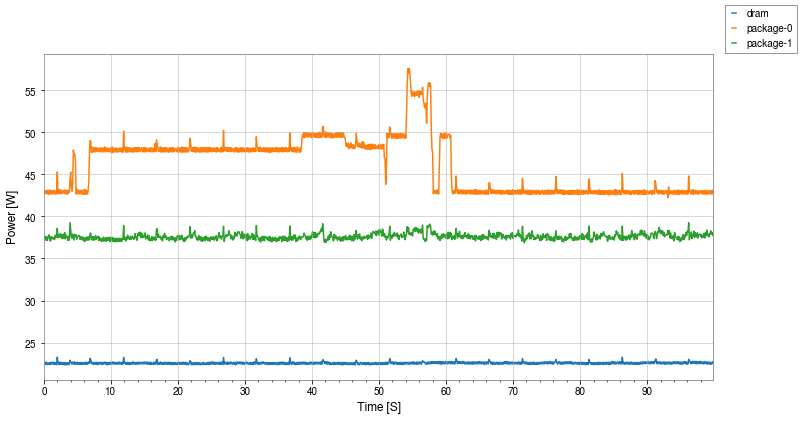

In [4]:
profiler=Profiler()
profiler.load_profile("bench.hdf5")
profiler.plot()